The web is an overcrowded space of data. In fact, you will find it in different shapes and formats, from simple tabular sheets like excel files to large and unstructered NoSql databases. the variety of content is overwhelming: texts, logs, tweets, images, comments, likes, views, videos, reports, news headlines. All of these are constantly produced on a real time fashion, all over the world, generating <a href="http://www.vcloudnews.com/every-day-big-data-statistics-2-5-quintillion-bytes-of-data-created-daily/"> quintillions of bytes</a> everyday. 

If you could think one second about what you could do about this and how you could make use of open-source data, you will find many applications:
- If you're a marketer, you could feel and quantify the impact of your newly released product by applying sentiment analysis on tweets. You'll then catch the uninterested/unsatisfied users and understand what made them unhappy.
- If you're into finance, you could collect stocks historical data and build statistical models to predict the future stock prices.
- You could collect your country open data and investigate different metrics (growth rate, crime rate, unemployment ...). You could even correlate your results and cross them with other data sources and come up with new insights! 

In this tutorial, we will also make sense of the data for a specific use case. We will collect news feeds from 60 different sources (Google News, The BBC, Business Insider, BuzzFeed, etc). We will ingest them in a usable format. We'll then apply some machine learning techniques to cluster the articles by their similarity and we'll finally visualize the results to get high level insights. This will give us a visual sense of the grouping clusters and the underlying topics. These techniques are part of what we call topic mining.

Following the structure of the previous tutorial, I'll go through different steps and explain the code on the fly.

- I'll collect the news by requesting an external powerful REST API called newsapi. I'll connect to this service through a python script that runs in my server background every five minutes and fetches the data and stores it in a csv file. 

- Once the data is collected and stored, I'll ingest it in a pandas dataframe. I'll first preprocess it using text preprocessing tokenization and the tfidf algorithm and then I'll cluster it using 2 different algorithms: K-means and Latent Dirichlet Allocation (LDA). Details below.

- Finally I'll visualize the resulting clusters using two interactive python visualization libraries. They're called Bokeh and pyldavis, they're awesome and you'll see why.
 
Let's get started !

## 1 - Environment setup

In this tutorial, I'll be using python 3.6 
One thing I recommend is downloading the Anaconda distribution for python 3.6 from this <a href="https://www.continuum.io/downloads">link</a>. This distribution wraps python with the necessary packages used in data science like Numpy, Pandas, Scipy or Scikit-learn.

For the purpose of this tutorial we'll also have to download external packages:

- tqdm (a progress bar python utility) from this command: pip install tqdm
- nltk (for natural language processing) from this command: conda install -c anaconda nltk=3.2.2
- bokeh (for interactive data viz) from this command: conda install bokeh
- lda (the python implementation of Latent Dirichlet Allocation) from this command: pip install lda
- pyldavis (python package to visualize lda topics): pip install pyldavis

To connect to the Newsapi service you'll have to create an account at https://newsapi.org/register to get a key. It's totally free. Then you'll have to put your key in the code and run the script on your own if you want to. 

You can download the data I fetched from my github account. Link below.


This post is entirely written in Jupyter notebook which is my favorite tool for data analysis and discovery. I'll post it on github so that you can download it and reproduce the results on your side.

## 2 - Data acquisition from Newsapi.org

In [1]:
from IPython.display import Image
Image("./newsapi.PNG")

Well, this looks like something very handy. It avoids you the tedious data scrapping that you would perform on each site separately.
Getting the latest news for a specific source like Techcrunch is as simple as sending a get request to this address:
https://newsapi.org/v1/articles?source=techcrunch&apiKey={API_KEY}
The JSON file resulting from this response is pretty straightforward:

```
{
"status": "ok",
"source": "techcrunch",
"sortBy": "top",
-"articles": [
-{
"author": "Khaled \"Tito\" Hamze",
"title": "Crunch Report",
"description": "Your daily roundup of the biggest TechCrunch stories and startup news.",
"url": "https://techcrunch.com/video/crunchreport/",
"urlToImage": "https://tctechcrunch2011.files.wordpress.com/2015/03/tccrshowogo.jpg?w=500&h=200&crop=1",
"publishedAt": "2017-03-02T04:40:50Z"
},
-{
"author": "Kate Conger, Devin Coldewey",
"title": "Marissa Mayer forgoes bonus and equity in wake of Yahoo security incidents",
"description": "Yahoo’s board has decided that CEO Marissa Mayer will not receive her annual bonus this year, a decision linked to Yahoo’s handling of the 2014 security..",
"url": "https://techcrunch.com/2017/03/01/marissa-mayer-forgoes-bonus-and-equity-in-wake-of-yahoo-security-incidents/",
"urlToImage": "https://tctechcrunch2011.files.wordpress.com/2014/05/marissa-mayer3.jpg?w=764&h=400&crop=1",
"publishedAt": "2017-03-01T22:20:38Z"
},
-{
"author": "Matthew Lynley",
"title": "Snap values itself at nearly $24B with its IPO pricing",
"description": "Snap has given a final price for its IPO, setting the company's valuation at nearly $24 billion with a price of $17 per share, according to a report by The..",
"url": "https://techcrunch.com/2017/03/01/snap-values-itself-at-nearly-24b-with-its-ipo-pricing/",
"urlToImage": "https://tctechcrunch2011.files.wordpress.com/2016/12/8a82586a123a7429edd0ca2f65ddbeda.jpg?w=764&h=400&crop=1",
"publishedAt": "2017-03-01T19:49:15Z"
},
-{
"author": "Lucas Matney",
"title": "Oculus co-founder talks new Rift pricing, Touch adoption and possible Mac support",
"description": "While so many virtual reality hardware companies have been tasked only with selling their own product, Oculus has had the intense challenge of building the..",
"url": "https://techcrunch.com/2017/03/01/oculus-co-founder-talks-new-rift-pricing-touch-adoption-and-possible-mac-support/",
"urlToImage": "https://tctechcrunch2011.files.wordpress.com/2017/03/2016-09-14_oculus_134750-1-0022.jpg?w=764&h=400&crop=1",
"publishedAt": "2017-03-01T18:56:02Z"
},
-{
"author": "Matthew Lynley",
"title": "Five burning questions that Snap’s IPO is about to answer",
"description": "Snap will begin publicly trading tomorrow, which means that it will officially give a price for its shares in its initial public offering this evening...",
"url": "https://techcrunch.com/2017/03/01/five-burning-questions-that-snaps-ipo-is-about-to-answer/",
"urlToImage": "https://tctechcrunch2011.files.wordpress.com/2017/02/gettyimages-616058338.jpg?w=764&h=400&crop=1",
"publishedAt": "2017-03-01T17:55:28Z"
}
]
}
```

The 'articles' object is a list of JSON files corresponding to the latest published articles. As you can see, we can not go far into the historical data to extract a large dump of articles.

One solution I came up with to get a large set of news articles was to request the address above for every source at every 5 minutes for a period of time. As for now, the script has been running for more than two weeks.

Let's get into the code to see how to manage this data acquisition:

In [2]:
# import packages
import requests
import pandas as pd
from datetime import datetime
from tqdm import tqdm
from matplotlib import pyplot as plt

In this post, we'll be analyzing english news sources only. 

In [3]:
# a function to extract the sources I'll be analyzing. I'll focus on the english ones
def getSources():
    source_url = 'https://newsapi.org/v1/sources?language=en'
    response = requests.get(source_url).json()
    sources = []
    for source in response['sources']:
        sources.append(source['id'])
    return sources

In [4]:
# let's see what news sources we have
sources = getSources()
print('number of sources :', len(sources))
print('sources :', sources)

number of sources : 60
sources : ['abc-news-au', 'ars-technica', 'associated-press', 'bbc-news', 'bbc-sport', 'bloomberg', 'business-insider', 'business-insider-uk', 'buzzfeed', 'cnbc', 'cnn', 'daily-mail', 'engadget', 'entertainment-weekly', 'espn', 'espn-cric-info', 'financial-times', 'football-italia', 'fortune', 'four-four-two', 'fox-sports', 'google-news', 'hacker-news', 'ign', 'independent', 'mashable', 'metro', 'mirror', 'mtv-news', 'mtv-news-uk', 'national-geographic', 'new-scientist', 'newsweek', 'new-york-magazine', 'nfl-news', 'polygon', 'recode', 'reddit-r-all', 'reuters', 'sky-news', 'sky-sports-news', 'talksport', 'techcrunch', 'techradar', 'the-economist', 'the-guardian-au', 'the-guardian-uk', 'the-hindu', 'the-huffington-post', 'the-lad-bible', 'the-new-york-times', 'the-next-web', 'the-sport-bible', 'the-telegraph', 'the-times-of-india', 'the-verge', 'the-wall-street-journal', 'the-washington-post', 'time', 'usa-today']


Newsapi allows you to map each data source to its category. Let's use this information as an additional feature in our dataset. This may be useful later.

In [5]:
# a dictionary mapping each source id (from the list displayed above) to the corresponding news category
def mapping():
    d = {}
    response = requests.get('https://newsapi.org/v1/sources?language=en')
    response = response.json()
    for s in response['sources']:
        d[s['id']] = s['category']
    return d

In [6]:
# let's check the category of reuters and techcrunch for example:
m = mapping()
print('category of reuters:', m['reuters'])
print('category of techcrunch:', m['techcrunch'])

category of reuters: general
category of techcrunch: technology


In [7]:
# let's see what categories we have:
print('categories:', list(set(m.values())))

categories: ['music', 'entertainment', 'sport', 'gaming', 'science-and-nature', 'general', 'business', 'technology']


The main function is getDailyNews. It will loop on each news source, request the api, extract the data and dump it to a pandas DataFrame and then export the result to csv file.

On each iteration of the loop the csv file is updated and cleaned. Redundant lines are removed. This is handled by cleanData function.

For each article we'll collect these fields:

- author
- title
- description
- url
- urlToImage
- publishedAt

And add two other features:
- category
- scraping_date : the time at which the script runs. This will help us track the data.

Here is the complete script:

Ok, now this script needs to run repetitively to collect the data. 

To do this:

I uploaded the script to my linux server at this path /home/news/news.py then I created a crontab schedule to tell my server to run news.py every 5 minutes. To do this: 
 - from the terminal, type crontab -e to edit the crontab file
 - add this line to the end of the file using nano or vim: \*/5 \* \* \* \* /root/anaconda2/bin/python /home/news/news.py
    (put absolute paths for your executables).
    
  basically what this command tells the server is: "for every 5 minutes (\*/5) of every hour (\*) of every day of the month (\*) of every month (\*) and whatever the day of the week (\*), run the news.py script.
    
 -  give your script the execution permission. Otherwise, this won't work: chmod +x news.py 


Now that the data has been collected, we will start anlayzing it :

- We'll have a look at the dataset and inspect it
- We'll apply some preoprocessings on the texts: tokenization, tf-idf
- We'll cluster the articles using two different algorithms (Kmeans and LDA)
- We'll visualize the clusters using Bokeh and pyldavis

## 3 - Data analysis

### 3 - 1 - Data discovery

In [8]:
%matplotlib inline
# pandas for data manipulation
import pandas as pd
pd.options.mode.chained_assignment = None
# nltk for nlp
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
# list of stopwords like articles, preposition
stop = set(stopwords.words('english'))
from string import punctuation
from collections import Counter
import re
import numpy as np

In [9]:
data = pd.read_csv('./news.csv')

The data is now ingested in a Pandas DataFrame.

Let's see how it looks like.

In [10]:
data.head()

author  \
0      http://www.abc.net.au/news/lisa-millar/166890   
1  http://www.abc.net.au/news/emily-sakzewski/768...   
2  http://www.abc.net.au/news/jackson-vernon/7531870   
3  http://www.abc.net.au/news/sophie-mcneill/4516794   
4  http://www.abc.net.au/news/dan-conifer/5189074...   

                                         description           publishedAt  \
0  In the month following Donald Trump's inaugura...  2017-02-26T08:08:20Z   
1  A fasting diet could reverse diabetes and repa...  2017-02-26T04:39:24Z   
2  Researchers discover what could be one of the ...  2017-02-26T02:02:28Z   
3  Yemen is now classified as the world's worst h...  2017-02-26T09:56:12Z   
4  Malcolm Turnbull and Joko Widodo hold talks in...  2017-02-26T03:43:04Z   

        source                                              title  \
0  abc-news-au  Has Russia changed its tone towards Donald Trump?   
1  abc-news-au  Fasting diet 'could reverse diabetes and regen...   
2  abc-news-au  Mine pollution turning Blue Mountains river in...   
3  abc-news-au  Australia ignores unfolding humanitarian catas...   
4  abc-news-au  Australia and Indonesia agree to fully restore...   

                                                 url  \
0  http://www.abc.net.au/news/2017-02-26/donald-t...   
1  http://www.abc.net.au/news/2017-02-26/fasting-...   
2  http://www.abc.net.au/news/2017-02-26/blue-mou...   
3  http://www.abc.net.au/news/2017-02-26/humanita...   
4  http://www.abc.net.au/news/2017-02-26/indonesi...   

                                          urlToImage category  \
0  http://www.abc.net.au/news/image/8300726-1x1-7...  general   
1  http://www.abc.net.au/news/image/8304732-1x1-7...  general   
2  http://www.abc.net.au/news/image/8304524-1x1-7...  general   
3  http://www.abc.net.au/news/image/7903812-1x1-7...  general   
4  http://www.abc.net.au/news/image/8304516-1x1-7...  general   

                scraping_date  
0  2017-02-26 13:08:22.317772  
1  2017-02-26 13:08:22.317772  
2  2017-02-26 13:08:22.317772  
3  2017-02-26 13:08:22.317772  
4  2017-02-26 13:08:22.317772

It's cool to have all these features. In this article, we will be mainly focusing on the description column.

Let's look at the data shape.

In [11]:
print('data shape:', data.shape)

data shape: (31009, 9)


Let's check the distribution of the different categories across the dataset.

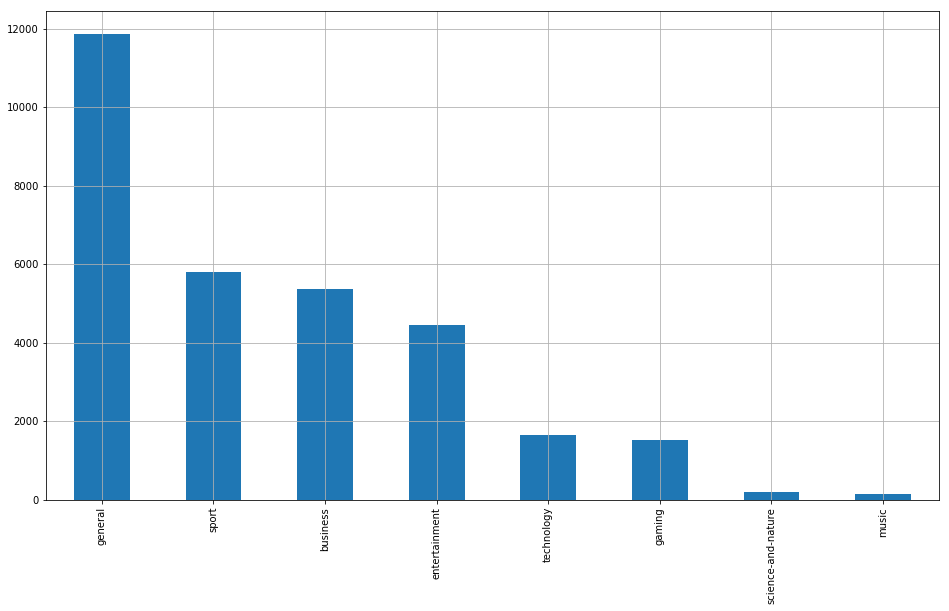

In [12]:
data.category.value_counts().plot(kind='bar', grid=True, figsize=(16, 9))

Many mixed topics are included in the "general" category.

This gives us a very superficial classificaion of the news. It doesn't tell us the underlying topics, nor the keywords and and the most relevant news per each category. 

To get that sort of information, we'll have to process the descriptions of each article since these variables naturally carry more meanings.

Before doing that, let's focus on the news articles whose description length is higher than 140 characters (a tweet length). Shorter descriptions happen to introduce lots of noise.

In [14]:
# remove duplicate description columns
data = data.drop_duplicates('description')

In [15]:
# remove rows with empty descriptions
data = data[~data['description'].isnull()]

In [16]:
data.shape

(27865, 9)

In [17]:
data['len'] = data['description'].map(len)

In [18]:
data = data[data.len > 140]
data.reset_index(inplace=True)
data.drop('index', inplace=True, axis=1)

In [19]:
data.shape

(9361, 10)

We are left with 30% of the initial dataset.

### 3 - 2 - Text processing : tokenization

Now we start by building a tokenizer. This will, for every description:

- break the descriptions into sentences and then break the sentences into tokens
- remove punctuation and stop words
- lowercase the tokens

In [20]:
def tokenizer(text):
    try:
        tokens_ = [word_tokenize(sent) for sent in sent_tokenize(text)]
        
        tokens = []
        for token_by_sent in tokens_:
            tokens += token_by_sent

        tokens = list(filter(lambda t: t.lower() not in stop, tokens))
        tokens = list(filter(lambda t: t not in punctuation, tokens))
        tokens = list(filter(lambda t: t not in [u"'s", u"n't", u"...", u"''", u'``', 
                                            u'\u2014', u'\u2026', u'\u2013'], tokens))
        filtered_tokens = []
        for token in tokens:
            if re.search('[a-zA-Z]', token):
                filtered_tokens.append(token)

        filtered_tokens = list(map(lambda token: token.lower(), filtered_tokens))

        return filtered_tokens
    except Error as e:
        print(e)

A new column 'tokens' can be easily created using the map method applied to the 'description' column.

In [21]:
data['tokens'] = data['description'].map(tokenizer)

The tokenizer has been applied to each description through all rows. Each resulting value is then put into the 'tokens' column that is created after the assignment. Let's check what the tokenization looks like for the first 5 descriptions:

In [22]:
for descripition, tokens in zip(data['description'].head(5), data['tokens'].head(5)):
    print('description:', descripition)
    print('tokens:', tokens)
    print() 

description: Researchers discover what could be one of the worst cases of mine pollution in the world in the heart of New South Wales' pristine heritage-listed Blue Mountains.
tokens: ['researchers', 'discover', 'could', 'one', 'worst', 'cases', 'mine', 'pollution', 'world', 'heart', 'new', 'south', 'wales', 'pristine', 'heritage-listed', 'blue', 'mountains']

description: Malcolm Turnbull and Joko Widodo hold talks in Sydney, reviving cooperation halted after the discovery of insulting posters at a military base, and reaching deals on trade and a new consulate in east Java.
tokens: ['malcolm', 'turnbull', 'joko', 'widodo', 'hold', 'talks', 'sydney', 'reviving', 'cooperation', 'halted', 'discovery', 'insulting', 'posters', 'military', 'base', 'reaching', 'deals', 'trade', 'new', 'consulate', 'east', 'java']

description: KUALA LUMPUR, Malaysia (AP) — Malaysia's health minister said Sunday that the dose of nerve agent given to North Korean ruler Kim Jong Un's exiled half brother was so 

Let's group the tokens by category, apply a word count and display the top 10 most frequent tokens. 

In [23]:
def keywords(category):
    tokens = data[data['category'] == category]['tokens']
    alltokens = []
    for token_list in tokens:
        alltokens += token_list
    counter = Counter(alltokens)
    return counter.most_common(10)

In [24]:
for category in set(data['category']):
    print('category :', category)
    print('top 10 keywords:', keywords(category))
    print('---')

category : music
top 10 keywords: [('years', 2), ('twitter', 2), ('could', 2), ('best', 2), ('facial', 2), ('break', 2), ('marnie', 2), ('bloor', 2), ('lewis', 2), ('aaron', 1)]
---
category : entertainment
top 10 keywords: [('new', 185), ('one', 120), ('first', 105), ('season', 86), ('two', 84), ('last', 83), ('appeared', 83), ('originally', 82), ('article', 81), ('show', 78)]
---
category : sport
top 10 keywords: [('league', 194), ('new', 156), ('season', 151), ('first', 135), ('team', 131), ('nfl', 128), ('one', 118), ('back', 103), ('win', 102), ('time', 101)]
---
category : science-and-nature
top 10 keywords: [('could', 23), ('may', 16), ('help', 10), ('people', 9), ('space', 8), ('per', 8), ('health', 8), ('million', 8), ('us', 8), ('cent', 7)]
---
category : gaming
top 10 keywords: [('playing', 4), ('ign', 3), ('week', 3), ('comics', 3), ('gaming', 3), ('players', 3), ('well', 2), ('fran', 2), ('wild', 2), ('one', 2)]
---
category : general
top 10 keywords: [('trump', 1024), ('p

Looking at these lists, we can formulate some hypotheses:

- the sport category deals with the champions' league, the footbal season and NFL
- some tech articles refer to Google
- the business news seem to be highly correlated with US politics and Donald Trump (this mainly originates from us press)

Extracting the top 10 most frequent words per each category is straightforward and can point to important keywords. 

However, although we did preprocess the descriptions and remove the stop words before, we still end up with words that are very generic (e.g: today, world, year, first) and don't carry a specific meaning that may describe a topic.

As a first approach to prevent this, we'll use tf-idf

### 3 - 3 - Text processing : tf-idf

tf-idf stands for term frequencey-inverse document frequency. It's a numerical statistic intended to reflect how important a word is to a document or a corpus (i.e a collection of documents). 

To relate to this post, words correpond to tokens and documents correpond to descriptions. A corpus is therefore a collection of descriptions.

The tf-idf a of a term t in a document d is proportional to the number of times the word t appears in the document d but is also offset by the frequency of the term t in the collection of the documents of the corpus. This helps adjusting the fact that some words appear more frequently in general and don't especially carry a meaning.

tf-idf acts therefore as a weighting scheme to extract relevant words in a document.

$$tfidf(t,d) = tf(t,d) . idf(t) $$

$tf(t,d)$ is the term frequency of t in the document d (i.e. how many times the token t appears in the description d)

$idf(t)$ is the inverse document frequency of the term t. it's computed by this formula:

$$idf(t) = log(1 + \frac{1 + n_d}{1 + df(d,t)}) $$

- $n_d$ is the number of documents
- $df(d,t)$ is the number of documents (or descriptions) containing the term t

Computing the tfidf matrix is done using the TfidfVectorizer method from scikit-learn. Let's see how to do this:

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# min_df is minimum number of documents that contain a term t
# max_features is maximum number of unique tokens (across documents) that we'd consider
# TfidfVectorizer preprocesses the descriptions using the tokenizer we defined above

vectorizer = TfidfVectorizer(min_df=10, max_features=10000, tokenizer=tokenizer, ngram_range=(1, 2))
vz = vectorizer.fit_transform(list(data['description']))

In [26]:
vz.shape

(9361, 4194)

vz is a tfidf matrix. 

- its number of rows is the total number of documents (descriptions) 
- its number of columns is the total number of unique terms (tokens) across the documents (descriptions)

$x_{dt}  = tfidf(t,d)$ where $x_{dt}$ is the element at the index (d,t) in the matrix.

Let's create a dictionary mapping the tokens to their tfidf values 

In [27]:
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

We can visualize the distribution of the tfidf scores through an histogram

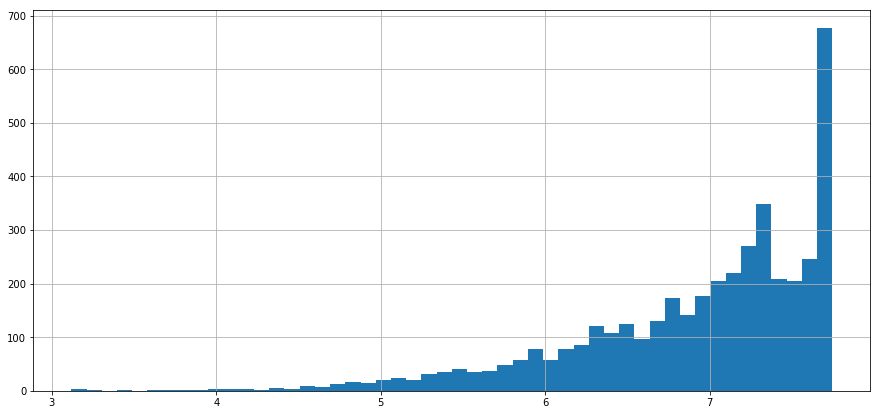

In [28]:
tfidf.tfidf.hist(bins=50, figsize=(15,7))

Let's display the 30 tokens that have the lowest tfidf scores 

In [29]:
tfidf.sort_values(by=['tfidf'], ascending=True).head(30)

tfidf
trump             3.118876
president         3.162480
said              3.180279
new               3.238661
donald            3.427819
donald trump      3.599065
one               3.697108
first             3.724419
u.s.              3.838139
president donald  3.843628
two               3.929806
house             3.974803
last              4.000229
would             4.037391
former            4.064481
ap                4.066772
people            4.085291
could             4.106543
time              4.173152
year              4.173152
years             4.178267
tuesday           4.185990
may               4.230911
government        4.303773
week              4.330284
white             4.345322
monday            4.345322
state             4.369863
back              4.391842
according         4.401411

Not surprisingly, we end up with a list of very generic words. These are very common across many descriptions. tfidf attributes a low score to them as a penalty for not being relevant. Words likes may, one, new, back, etc.

You may also notice that Trump, Donald, U.S and president are part of this list for being mentioned in many articles. So maybe this may be the limitation of the algorithm.

Now let's check out the 30 words with the highest tfidf scores.

In [30]:
tfidf.sort_values(by=['tfidf'], ascending=False).head(30)

tfidf
photographs          7.746519
u.s. stocks          7.746519
manifesto pledge     7.746519
oath                 7.746519
2-year-old daughter  7.746519
attorney preet       7.746519
years later          7.746519
oval office          7.746519
client               7.746519
million income       7.746519
world’s largest      7.746519
north london         7.746519
reign                7.746519
outskirts            7.746519
court heard          7.746519
produce              7.746519
manohar              7.746519
brandon              7.746519
escape               7.746519
eight years          7.746519
six muslim-majority  7.746519
fish                 7.746519
ga.                  7.746519
watson               7.746519
shop                 7.746519
require              7.746519
flag                 7.746519
missile defense      7.746519
mixed                7.746519
ratings              7.746519

We end up with less common words. These words naturally carry more meaning for the given description and may outline the underlying topic.

As you've noticed, the documents have more than 4000 features (see the vz shape). put differently, each document has more than 4000 dimensions.

If we want to plot them like we usually do with geometric objects, we need to reduce their dimension to 2 or 3 depending on whether we want to display on a 2D plane or on a 3D space. This is what we call dimensionality reduction.

To perform this task, we'll be using a combination of two popular techniques: Singular Value Decomposition (SVD) to reduce the dimension to 50 and then t-SNE to reduce the dimension from 50 to 2. t-SNE is more suitable for dimensionality reduction to 2 or 3.

Let's start reducing the dimension of each vector to 50 by SVD.

In [31]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50, random_state=0)
svd_tfidf = svd.fit_transform(vz)

In [32]:
svd_tfidf.shape

(9361, 50)

Bingo. Now let's do better. From 50 to 2!

In [33]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_tfidf = tsne_model.fit_transform(svd_tfidf)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 9361
[t-SNE] Computed conditional probabilities for sample 2000 / 9361
[t-SNE] Computed conditional probabilities for sample 3000 / 9361
[t-SNE] Computed conditional probabilities for sample 4000 / 9361
[t-SNE] Computed conditional probabilities for sample 5000 / 9361
[t-SNE] Computed conditional probabilities for sample 6000 / 9361
[t-SNE] Computed conditional probabilities for sample 7000 / 9361
[t-SNE] Computed conditional probabilities for sample 8000 / 9361
[t-SNE] Computed conditional probabilities for sample 9000 / 9361
[t-SNE] Computed conditional probabilities for sample 9361 / 9361
[t-SNE] Mean sigma: 0.061218
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.247375
[t-SNE] Error after 300 iterations: 1.247375


Let's check the size.

In [34]:
tsne_tfidf.shape

(9361, 2)

Each description is now modeled by a two dimensional vector. 

Let's see what tsne_idf looks like.

In [35]:
tsne_tfidf

array([[  7.69915656,  -4.98227799],
       [ 10.63074735,  -2.85524484],
       [  8.73919302,   5.31266416],
       ..., 
       [ -9.07820579,   4.83042557],
       [ -1.53490535,  -8.33400456],
       [ -1.96923235, -10.07561762]])

We're having two float numbers per discription. This is not interpretable at first sight. 

What we need to do is find a way to display these points on a plot and also attribute the corresponding description to each point.

matplotlib is a very good python visualization libaray. However, we cannot easily use it to display our data since we need interactivity on the objects. One other solution could be d3.js that provides huge capabilities in this field. 

Right now I'm choosing to stick to python so I found a tradeoff : it's called Bokeh.

"Bokeh is a Python interactive visualization library that targets modern web browsers for presentation. Its goal is to provide elegant, concise construction of novel graphics in the style of D3.js, and to extend this capability with high-performance interactivity over very large or streaming datasets. Bokeh can help anyone who would like to quickly and easily create interactive plots, dashboards, and data applications." To know more, please refer to this <a href="http://bokeh.pydata.org/en/latest/"> link </a>

Let's start by importing bokeh packages and initializing the plot figure.

In [36]:
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook

In [37]:
output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="tf-idf clustering of the news",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

Loading BokehJS ...

In [38]:
tfidf_df = pd.DataFrame(tsne_tfidf, columns=['x', 'y'])
tfidf_df['description'] = data['description']
tfidf_df['category'] = data['category']

Bokeh need a pandas dataframe to be passed as a source data. this is a very elegant way to read data.

In [39]:
plot_tfidf.scatter(x='x', y='y', source=tfidf_df)
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"description": "@description", "category":"@category"}
show(plot_tfidf)

Bokeh charts offer many functionalities:

- navigating in the data
- zooming
- hovering on each data point and displaying the corresponding description
- saving the chart

When the description popup doesn't show properly you have to move the data point slightly on the left.

By hovering on each news cluster, we can see groups of descriptions of similar keywords and thus referring to the same topic.

Now we're going to use clustering algorithms on the tf-idf matrix.

## 4 - Clustering 
### 4 - 1 - KMeans

Our starting point is the tf-idf matrix vz. Let's check its size again.

In [40]:
vz.shape

(9361, 4194)

This matrix can be seen as a collection of (x) high-dimensional vectors (y). Some algorithms like K-means can crunch this data structure and produce blocks of similar or "close" data points based on some similarity measure like the euclidean distance.

One thing to know about Kmeans is that it needs the number of clusters up front. This number is usually found by trying different values until the result looks satisfactory.

I found that 20 was a good number that separates the dataset nicely.

In [41]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.cluster import MiniBatchKMeans

num_clusters = 30
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmeans = kmeans_model.fit(vz)
kmeans_clusters = kmeans.predict(vz)
kmeans_distances = kmeans.transform(vz)

Let's see the five first description and the associated cluster

In [42]:
for (i, desc),category in zip(enumerate(data.description),data['category']):
    if(i < 5):
        print("Cluster " + str(kmeans_clusters[i]) + ": " + desc + 
              "(distance: " + str(kmeans_distances[i][kmeans_clusters[i]]) + ")")
        print('category: ',category)
        print('---')

Cluster 3: Researchers discover what could be one of the worst cases of mine pollution in the world in the heart of New South Wales' pristine heritage-listed Blue Mountains.(distance: 0.98068303265)
category:  general
---
Cluster 26: Malcolm Turnbull and Joko Widodo hold talks in Sydney, reviving cooperation halted after the discovery of insulting posters at a military base, and reaching deals on trade and a new consulate in east Java.(distance: 0.996791188469)
category:  general
---
Cluster 14: KUALA LUMPUR, Malaysia (AP) — Malaysia's health minister said Sunday that the dose of nerve agent given to North Korean ruler Kim Jong Un's exiled half brother was so high that it killed him within 20 minutes and caused…(distance: 0.902446735057)
category:  general
---
Cluster 14: HANOI, Vietnam (AP) — Two women — a Vietnamese and an Indonesian — have been arrested for allegedly coating their hands with the immensely toxic chemical agent VX and wiping them on the face of the North Korean leader

This doesn't tell us much. What we need to look up are the "hot" keywords that describe each clusters. 

In [43]:
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i)
    aux = ''
    for j in sorted_centroids[i, :10]:
        aux += terms[j] + ' | '
    print(aux)
    print() 

Cluster 0:
social media | social | media | women | posted | news | comments | fury | violence | veterans | 

Cluster 1:
muhammad | airport | ali | detained | jr. | questioned | month | son | lawyer | separate | 

Cluster 2:
care | health | health care | plan | obamacare | care act | act | affordable | republicans | repeal | 

Cluster 3:
one | like | new | world | another | best | could | two | go | people | 

Cluster 4:
ncaa tournament | tournament | ncaa | coppa | coppa italia | italia | percent | semi-final | juventus | napoli | 

Cluster 5:
energy | executive | chief | chief executive | nascar | atlanta motor | atlanta | motor | monster energy | monster | 

Cluster 6:
white | white house | house | trump | president | donald | donald trump | president donald | spicer | said | 

Cluster 7:
attorney general | attorney | general | sessions | jeff | jeff sessions | general jeff | russian | ambassador | russian ambassador | 

Cluster 8:
league | manchester | premier | premier league | win

Looking at these clusters you can roughly have an idea of what's going on.


Let's plot these clusters. To do this we need to reduce the dimensionality of kmeans_distances to 2.

In [44]:
tsne_kmeans = tsne_model.fit_transform(kmeans_distances)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 9361
[t-SNE] Computed conditional probabilities for sample 2000 / 9361
[t-SNE] Computed conditional probabilities for sample 3000 / 9361
[t-SNE] Computed conditional probabilities for sample 4000 / 9361
[t-SNE] Computed conditional probabilities for sample 5000 / 9361
[t-SNE] Computed conditional probabilities for sample 6000 / 9361
[t-SNE] Computed conditional probabilities for sample 7000 / 9361
[t-SNE] Computed conditional probabilities for sample 8000 / 9361
[t-SNE] Computed conditional probabilities for sample 9000 / 9361
[t-SNE] Computed conditional probabilities for sample 9361 / 9361
[t-SNE] Mean sigma: 0.007932
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.349728
[t-SNE] Error after 300 iterations: 1.349728


Let's use a color palette to assign different colors to each cluster 

In [45]:
import numpy as np

colormap = np.array(["#6d8dca", "#69de53", "#723bca", "#c3e14c", "#c84dc9", "#68af4e", "#6e6cd5",
"#e3be38", "#4e2d7c", "#5fdfa8", "#d34690", "#3f6d31", "#d44427", "#7fcdd8", "#cb4053", "#5e9981",
"#803a62", "#9b9e39", "#c88cca", "#e1c37b", "#34223b", "#bdd8a3", "#6e3326", "#cfbdce", "#d07d3c",
"#52697d", "#7d6d33", "#d27c88", "#36422b", "#b68f79"])

plot_kmeans = bp.figure(plot_width=700, plot_height=600, title="KMeans clustering of the news",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

In [46]:
kmeans_df = pd.DataFrame(tsne_kmeans, columns=['x', 'y'])
kmeans_df['cluster'] = kmeans_clusters
kmeans_df['description'] = data['description']
kmeans_df['category'] = data['category']

In [47]:
plot_kmeans.scatter(x='x', y='y', 
                    color=colormap[kmeans_clusters], 
                    source=kmeans_df)
hover = plot_kmeans.select(dict(type=HoverTool))
hover.tooltips={"description": "@description", "category": "@category", "cluster":"@cluster"}
show(plot_kmeans)

It looks like clusters are separated nicely. By hovering on each one of them you can see the corresponding descriptions. At first sight you could notice that they deal approximately with the same topic. This is coherent since we build our clusters using similarities between relevant keywords.

We can also notice that within the same cluster, many subclusters are isolated from one another. This gives an idea about the global topic as well as the 


Kmeans separates the documents into disjoint clusters. the assumption is that each cluster is attributed a single topic.

However, descriptions may in reality be characterized by a "mixture" of topics. We'll cover how to deal with this problem with the LDA algorithm.

### 4 - 2 - 1 - Latent Dirichlet Allocation (with Bokeh)

Let's apply LDA on the data set. We'll set the number of topics to 20.

In [48]:
import lda
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
import logging
logging.getLogger("lda").setLevel(logging.WARNING)

In [50]:
cvectorizer = CountVectorizer(min_df=4, max_features=10000, tokenizer=tokenizer, ngram_range=(1,2))
cvz = cvectorizer.fit_transform(data['description'])

n_topics = 20
n_iter = 2000
lda_model = lda.LDA(n_topics=n_topics, n_iter=n_iter)
X_topics = lda_model.fit_transform(cvz)

In [51]:
n_top_words = 8
topic_summaries = []

topic_word = lda_model.topic_word_  # get the topic words
vocab = cvectorizer.get_feature_names()
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: may brexit said european eu theresa minister theresa may
Topic 1: said state military islamic forces mosul islamic state city
Topic 2: new new york york per ap cent city per cent
Topic 3: court states united united states federal government law immigration
Topic 4: trump president donald donald trump president donald obama white congress
Topic 5: first years time two three since second four
Topic 6: budget chancellor turkish would philip hammond tax make
Topic 7: party day minister women international election chief state
Topic 8: league live saturday champions night david champions league says
Topic 9: company new today announced google uber app service
Topic 10: one like get new it’s much way time
Topic 11: police two man years home london found woman
Topic 12: north korea south said korean north korea kim two
Topic 13: russian general attorney trump campaign attorney general sessions said
Topic 14: trump house president care health order donald trump donald
Topic 15: best l

In [52]:
tsne_lda = tsne_model.fit_transform(X_topics)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 9361
[t-SNE] Computed conditional probabilities for sample 2000 / 9361
[t-SNE] Computed conditional probabilities for sample 3000 / 9361
[t-SNE] Computed conditional probabilities for sample 4000 / 9361
[t-SNE] Computed conditional probabilities for sample 5000 / 9361
[t-SNE] Computed conditional probabilities for sample 6000 / 9361
[t-SNE] Computed conditional probabilities for sample 7000 / 9361
[t-SNE] Computed conditional probabilities for sample 8000 / 9361
[t-SNE] Computed conditional probabilities for sample 9000 / 9361
[t-SNE] Computed conditional probabilities for sample 9361 / 9361
[t-SNE] Mean sigma: 0.091730
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.470521
[t-SNE] Error after 350 iterations: 1.470521


In [53]:
doc_topic = lda_model.doc_topic_
lda_keys = []
for i, tweet in enumerate(data['description']):
    lda_keys += [doc_topic[i].argmax()]

In [54]:
plot_lda = bp.figure(plot_width=700, plot_height=600, title="LDA topic visualization",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

In [55]:
lda_df = pd.DataFrame(tsne_lda, columns=['x','y'])
lda_df['description'] = data['description']
lda_df['category'] = data['category']

In [56]:
lda_df['topic'] = lda_keys
lda_df['topic'] = lda_df['topic'].map(int)

In [57]:
plot_lda.scatter(source=lda_df, x='x', y='y', color=colormap[lda_keys])

hover = plot_lda.select(dict(type=HoverTool))
hover.tooltips={"description":"@description", "topic":"@topic", "category":"@category"}
show(plot_lda)

Better separation between the topics.

No more dominant topic.


### 4 - 2 - 2 Visualization of the topics using pyLDAvis


Now we're going to use a more convenient visualization to explore LDA topics. It's called pyldavis.

In [58]:
lda_df['len_docs'] = data['tokens'].map(len)

In [59]:
def prepareLDAData():
    data = {
        'vocab': vocab,
        'doc_topic_dists': lda_model.doc_topic_,
        'doc_lengths': list(lda_df['len_docs']),
        'term_frequency':cvectorizer.vocabulary_,
        'topic_term_dists': lda_model.components_
    } 
    return data

In [60]:
ldadata = prepareLDAData()

In [61]:
import pyLDAvis

In [62]:
pyLDAvis.enable_notebook()

In [63]:
prepared_data = pyLDAvis.prepare(**ldadata)

In [64]:
pyLDAvis.save_html(prepared_data,'./pyldadavis.html')

## 5 - Conclusion

In this post we explored many topics. 

- We set up a script to automatically extract newsfeed data from a REST API called newsapi.
- We processed the raw text by using different tools (pandas, nltk, scikit-learn)
- We applied tf-idf statistics as a natural language preprocessing technique
- We created clusters on top of the tf-idf matrix using the KMeans algorithm and visualized them using Bokeh
- We extracted topics using the Latent Dirichlet Allocation algorithm and visualized them using Bokeh and pyldavis

Different techniques have been used but I'm pretty sure there's plenty of better methods. In fact, one way to extend this tutorial could be to dive in: 

- word2vec and doc2vec to model the topics
- setting up a robust way to select the number of clusters/topics up front

Thanks for reading ! Don't hesitate to comment if you have a suggestion or an improvement. 

## 6 - References

- https://newsapi.org/
- http://scikit-learn.org/stable/modules/feature_extraction.html
- https://en.wikipedia.org/wiki/Tf%E2%80%93idf
- http://pythonhosted.org/lda/
- http://nbviewer.jupyter.org/github/skipgram/modern-nlp-in-python/blob/master/executable/Modern_NLP_in_Python.ipynb#topic=3&lambda=0.87&term=